## Hypothesis
To predict the incentive level requested to shut down or raise 5 degrees during the summer

DV: IncAwayS

IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg


In [16]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;
#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];
#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];
data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
#data1 <- data[data$AwaySNY==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
#    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
#    "Longitude", "Job","hot","cold"))];
data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
print(dim(data1))
sort(names(survey))
table(data1$AwaySNY)

[1] 826 114


[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT"        
 [71] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [76] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S" 
 [81] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [86] "IncWD"       "Income"      "Job"         "Latitude"    "Longitude"  
 [91] "MC"          "MC1"         "MC2"         "MC3"         "MC4"        
 [96] "MC5"         "MCBill"      "MCG"         "NBillS"      "NBillW"     
[101] "OwnRent"     "PBC"         "PBC1"        "PBC2"        "PBC3R"      
[106] "PBC4"        "PBC5"        "PBillStatus" "Political"   "ReasonNeg"  
[111] "ReasonPos"   "RewardForm"  "SN"          "SN1"         "SN2"        
[116] "SN3"         "SN4"         "Sqft"        "SqftCate"    "State"      
[121] "SubN"        "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
[126] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"     
[131] "Trust2"      "Trust3"      "Trust4"      "Utility"     "Winter_avg" 
[136] "Winter_avgC" "Winter_avgF" "X.9to5"      "cold"        "hot"        
[141] "row"         "valid"       "valid1"      "valid2"


  0   1   2 
165 562  99 

In [17]:
# on people with AC: ComfNS and Edu
library("xtable")
#Age, Income, Educ, OwnRent, SqftCate, EnergyC, MC, ComfNS, HabitC, Attitude, PBC, SubNorm
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Attitude', 
              'PBC', 'SubNorm')
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));

data2 = data1[data1$HomeSYN==1,which(names(data1) %in% c("IncAwayS", IndepPred)) ]
a=dim(data2);
data2 = na.omit(data2)
b=dim(data2);
print (c(a[1]-b[1], " rows dropped"));
mod = lm(fmla,data=data2)
smod = summary(mod)
tbl = xtable(smod$coefficients, caption=paste(c("N=",b[1]," Adj-R2=",round(smod$adj.r.squared,2)),collapse=""))
tbl
print(tbl, type = "html")


[1] "10"            " rows dropped"


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),15.4923,3.823,4.05,5.7e-05
Age,0.0052,0.038,0.14,8.9e-01
Income,0.2090,0.225,0.93,3.5e-01
Educ,-0.9164,0.369,-2.49,1.3e-02
OwnRent,0.7332,0.890,0.82,4.1e-01
SqftCate,-0.0673,0.414,-0.16,8.7e-01
EnergyC,0.1448,0.342,0.42,6.7e-01
MC,0.4834,0.403,1.20,2.3e-01
ComfNS,-0.8395,0.271,-3.10,2.0e-03
HabitC,-0.0304,0.292,-0.10,9.2e-01


<!-- html table generated in R 3.4.1 by xtable 1.8-2 package -->
<!-- Fri Oct 27 16:29:34 2017 -->
<table border=1>
<caption align="bottom"> N=652 Adj-R2=0.02 </caption>
<tr> <th>  </th> <th> Estimate </th> <th> Std. Error </th> <th> t value </th> <th> Pr(&gt;|t|) </th>  </tr>
  <tr> <td align="right"> (Intercept) </td> <td align="right"> 15.49 </td> <td align="right"> 3.82 </td> <td align="right"> 4.05 </td> <td align="right"> 0.00 </td> </tr>
  <tr> <td align="right"> Age </td> <td align="right"> 0.01 </td> <td align="right"> 0.04 </td> <td align="right"> 0.14 </td> <td align="right"> 0.89 </td> </tr>
  <tr> <td align="right"> Income </td> <td align="right"> 0.21 </td> <td align="right"> 0.22 </td> <td align="right"> 0.93 </td> <td align="right"> 0.35 </td> </tr>
  <tr> <td align="right"> Educ </td> <td align="right"> -0.92 </td> <td align="right"> 0.37 </td> <td align="right"> -2.49 </td> <td align="right"> 0.01 </td> </tr>
  <tr> <td align="right"> OwnRent </td> <td align="right"> 

Age   Income     Educ  OwnRent SqftCate  EnergyC       MC   ComfNS 
     1.2      1.3      1.1      1.4      1.4      1.6      1.3      1.1 
  HabitC Attitude      PBC  SubNorm 
     1.2      1.7      1.1      1.2

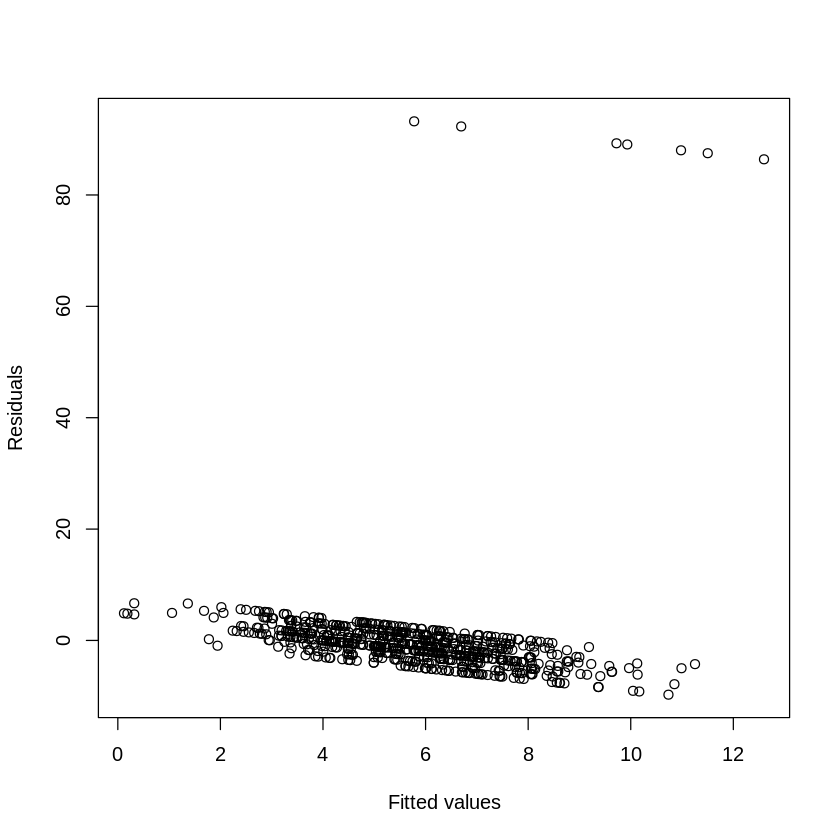

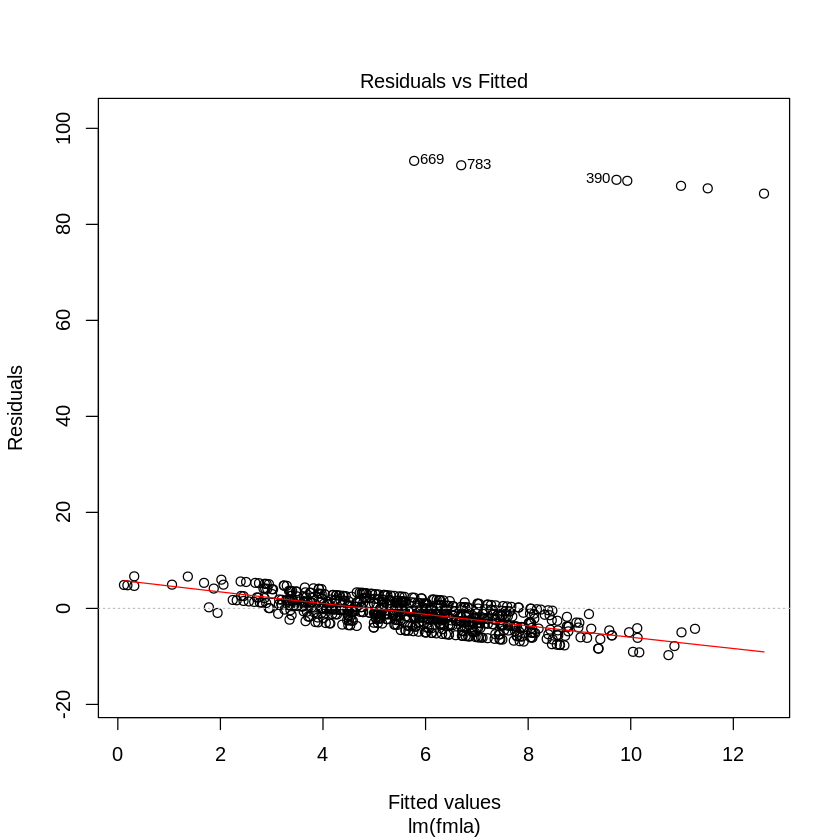

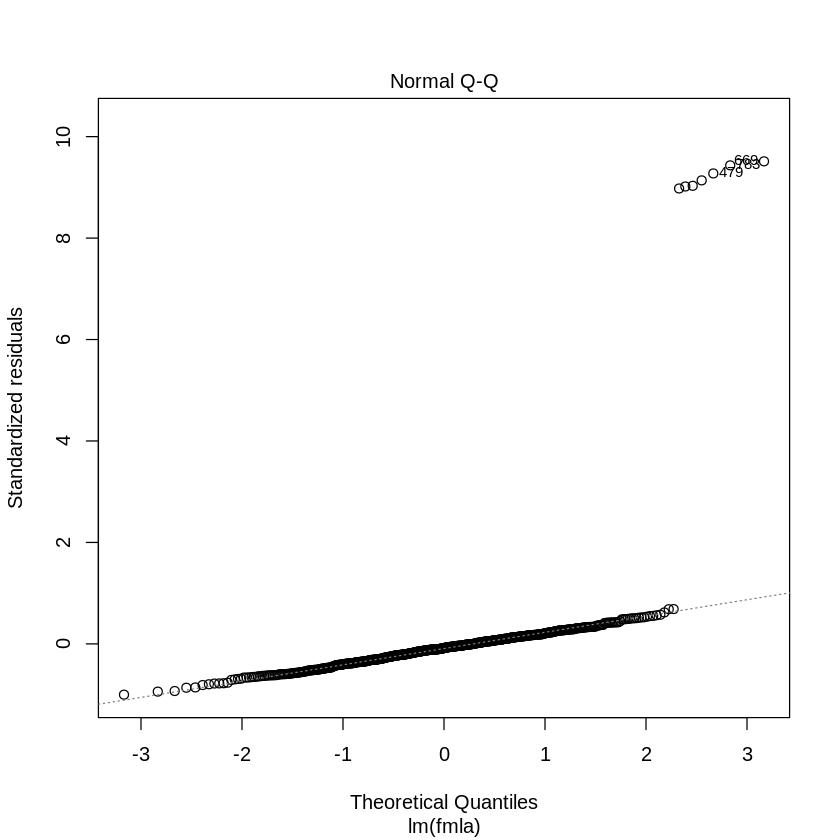

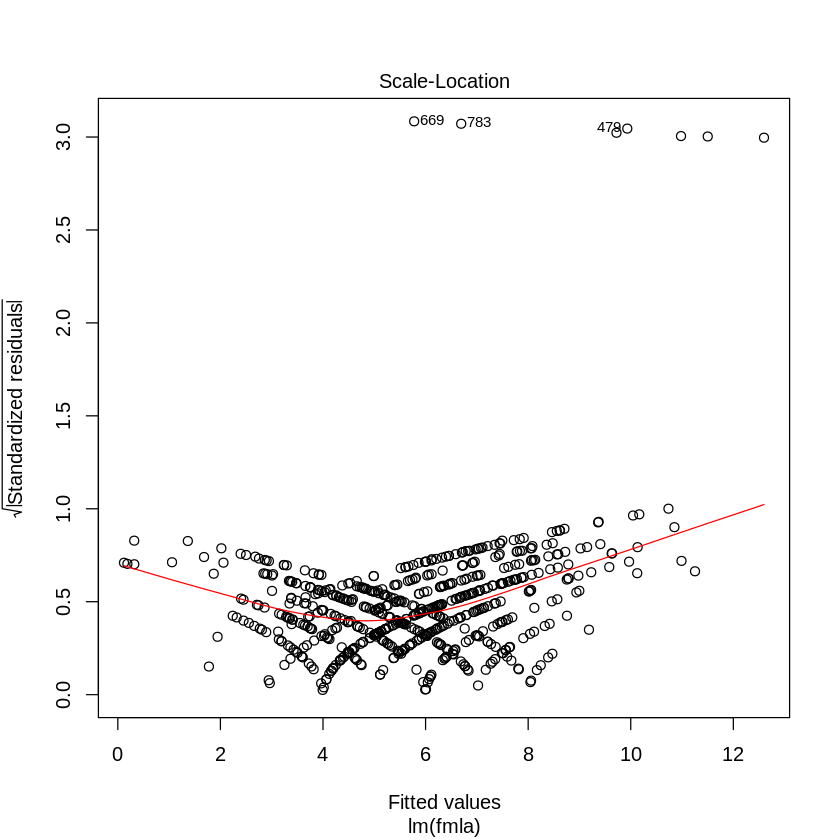

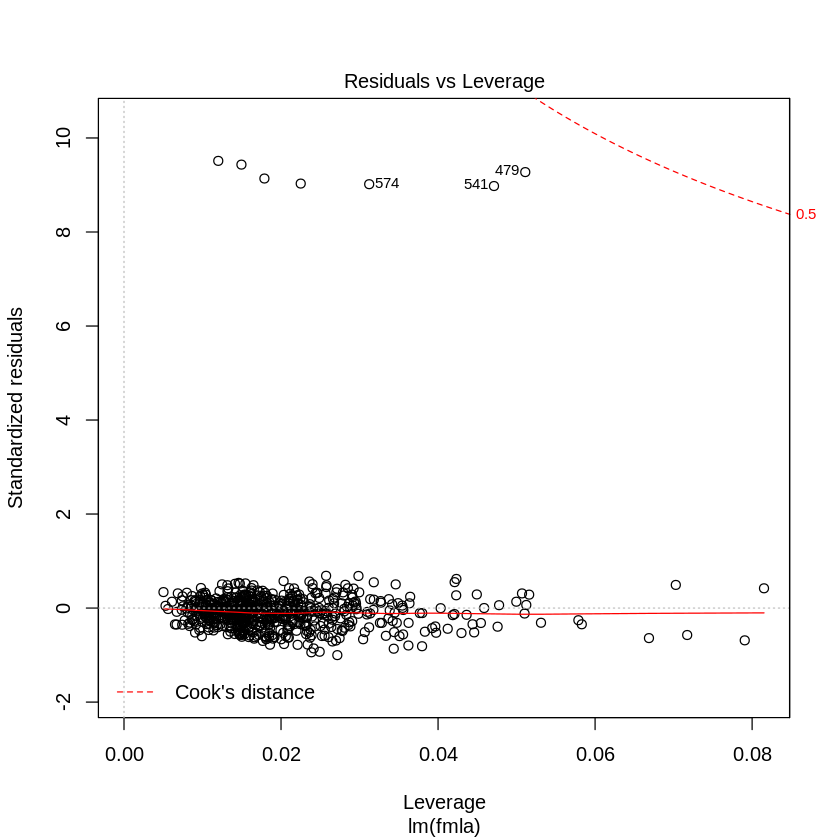

In [18]:
#Diagnostics need to resolve the problem with extreme values
library(car)
vif(mod)
plot(mod$fitted.values,mod$residuals, xlab="Fitted values", ylab="Residuals")    
#plot(data2$IncAwayS,mod$residuals, xlab="Response", ylab="Residuals")

plot(mod)

In [21]:
#result on full data: ComfNS and HabitC Att
data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
data2 = data1[,which(names(data1) %in% c("IncAwayS", IndepPred)) ]
a=dim(data2);
data2 = na.omit(data2)
b=dim(data2);
print (c(a[1]-b[1], " rows dropped"));
mod = lm(fmla,data=data2)
smod = summary(mod)
tbl = xtable(smod$coefficients, caption=paste(c("N=",b[1]," Adj-R2=",round(smod$adj.r.squared,2)),collapse=""))
tbl
print(tbl, type = "html")


[1] "13"            " rows dropped"


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),29.1537,8.393,3.4734,5.4e-04
Age,0.0530,0.084,0.6294,5.3e-01
Income,-0.2609,0.493,-0.5290,6.0e-01
Educ,-0.9130,0.815,-1.1209,2.6e-01
OwnRent,1.2777,2.015,0.6342,5.3e-01
SqftCate,-0.0048,0.910,-0.0053,1.0e+00
EnergyC,0.7962,0.775,1.0274,3.0e-01
MC,-0.3400,0.902,-0.3768,7.1e-01
ComfNS,-4.6310,0.551,-8.4060,1.9e-16
HabitC,2.9397,0.613,4.7995,1.9e-06


<!-- html table generated in R 3.4.1 by xtable 1.8-2 package -->
<!-- Fri Oct 27 16:31:46 2017 -->
<table border=1>
<caption align="bottom"> N=813 Adj-R2=0.12 </caption>
<tr> <th>  </th> <th> Estimate </th> <th> Std. Error </th> <th> t value </th> <th> Pr(&gt;|t|) </th>  </tr>
  <tr> <td align="right"> (Intercept) </td> <td align="right"> 29.15 </td> <td align="right"> 8.39 </td> <td align="right"> 3.47 </td> <td align="right"> 0.00 </td> </tr>
  <tr> <td align="right"> Age </td> <td align="right"> 0.05 </td> <td align="right"> 0.08 </td> <td align="right"> 0.63 </td> <td align="right"> 0.53 </td> </tr>
  <tr> <td align="right"> Income </td> <td align="right"> -0.26 </td> <td align="right"> 0.49 </td> <td align="right"> -0.53 </td> <td align="right"> 0.60 </td> </tr>
  <tr> <td align="right"> Educ </td> <td align="right"> -0.91 </td> <td align="right"> 0.81 </td> <td align="right"> -1.12 </td> <td align="right"> 0.26 </td> </tr>
  <tr> <td align="right"> OwnRent </td> <td align="right"

In [22]:
#result on AwaySNY data: ComfNS and Edu
data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
table(data1$AwaySNY)
data2 = data1[data1$AwaySNY==1,which(names(data1) %in% c("IncAwayS", IndepPred)) ]
a=dim(data2);
data2 = na.omit(data2)
b=dim(data2);
print (c(a[1]-b[1], " rows dropped"));
mod = lm(fmla,data=data2)
smod = summary(mod)
tbl = xtable(smod$coefficients, caption=paste(c("N=",b[1]," Adj-R2=",round(smod$adj.r.squared,2)),collapse=""))
tbl
print(tbl, type = "html")



  0   1   2 
165 562  99 

[1] "9"             " rows dropped"


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),16.6684,3.793,4.395,1.3e-05
Age,-0.0092,0.037,-0.246,8.1e-01
Income,0.1320,0.227,0.581,5.6e-01
Educ,-0.7391,0.363,-2.035,4.2e-02
OwnRent,0.7934,0.879,0.903,3.7e-01
SqftCate,-0.0130,0.415,-0.031,9.8e-01
EnergyC,0.1737,0.341,0.510,6.1e-01
MC,0.5368,0.400,1.343,1.8e-01
ComfNS,-0.9915,0.275,-3.607,3.4e-04
HabitC,-0.2893,0.291,-0.996,3.2e-01


<!-- html table generated in R 3.4.1 by xtable 1.8-2 package -->
<!-- Fri Oct 27 16:32:08 2017 -->
<table border=1>
<caption align="bottom"> N=553 Adj-R2=0.03 </caption>
<tr> <th>  </th> <th> Estimate </th> <th> Std. Error </th> <th> t value </th> <th> Pr(&gt;|t|) </th>  </tr>
  <tr> <td align="right"> (Intercept) </td> <td align="right"> 16.67 </td> <td align="right"> 3.79 </td> <td align="right"> 4.40 </td> <td align="right"> 0.00 </td> </tr>
  <tr> <td align="right"> Age </td> <td align="right"> -0.01 </td> <td align="right"> 0.04 </td> <td align="right"> -0.25 </td> <td align="right"> 0.81 </td> </tr>
  <tr> <td align="right"> Income </td> <td align="right"> 0.13 </td> <td align="right"> 0.23 </td> <td align="right"> 0.58 </td> <td align="right"> 0.56 </td> </tr>
  <tr> <td align="right"> Educ </td> <td align="right"> -0.74 </td> <td align="right"> 0.36 </td> <td align="right"> -2.04 </td> <td align="right"> 0.04 </td> </tr>
  <tr> <td align="right"> OwnRent </td> <td align="right"

Older analysis

In [6]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "80"   
[1] "HomeS" "164"  
[1] "AwayW" "151"  
[1] "AwayS" "264"  
[1] "IncWD" "98"   
[1] "IncDish" "271"    
[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "BillS" "2"    
[1] "BillW" "2"    
[1] "Sqft" "2"   
[1] "SqftCate" "2"       
[1] "HouseholdS" "2"         
[1] "Political" "2"        
[1] "Ethnic" "2"     
[1] "Income" "5"     
[1] "Educ" "7"   
[1] "Latitude" "26"      
[1] "Summer_avgF" "42"         
[1] "Winter_avgF" "42"         
[1] "Summer_avgC" "42"         
[1] "Winter_avgC" "42"         
[1] "Summer_avg" "42"        
[1] "Winter_avg" "42"        


In [3]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 562 108
[1] 507 108


In [4]:
sort(names(data2))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HouseholdS"  "INT"         "INT1"        "INT2"       
 [56] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [61] "IncAwayW"    "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W" 
 [66] "IncHomeS"    "IncHomeW"    "Income"      "Latitude"    "MC"         
 [71] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [76] "MCBill"      "OwnRent"     "PBC"         "PBC1"        "PBC2"       
 [81] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [86] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [91] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [96] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
[101] "Trust1"      "Trust2"      "Trust3"      "Trust4"      "Winter_avg" 
[106] "Winter_avgC" "Winter_avgF" "X.9to5"

In [5]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Attitude",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"Summer_avgF",     
"HomeS",
"CashYN")

In [6]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HouseholdS"  "INT"         "INT1"        "INT2"       
 [56] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [61] "IncAwayW"    "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W" 
 [66] "IncHomeS"    "IncHomeW"    "Income"      "Latitude"    "MC"         
 [71] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [76] "MCBill"      "OwnRent"     "PBC"         "PBC1"        "PBC2"       
 [81] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [86] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [91] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [96] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
[101] "Trust1"      "Trust2"      "Trust3"      "Trust4"      "Winter_avg" 
[106] "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"         "Attitude"    "CashYN"      "ComfNS"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Frugal"      "Gender"      "HabitC"     
[11] "HabitG"      "HomeS"       "HouseholdS"  "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "SubNorm"     "Summer_avgF" "Trust"

In [7]:
data1 <- data2[, which(names(data2) %in% c("IncAwayS",IVS))];
sort(names(data1))

[1] "Age"         "Attitude"    "CashYN"      "ComfNS"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Gender"      "HabitC"      "HabitG"     
[11] "HomeS"       "HouseholdS"  "IncAwayS"    "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "SubNorm"     "Summer_avgF"

In [8]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [9]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [10]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeS"       "IncAwayS"    "Age"         "Gender"      "OwnRent"    
 [6] "SqftCate"    "HouseholdS"  "Political"   "Ethnic"      "Income"     
[11] "Educ"        "Latitude"    "EnergyC"     "Attitude"    "PBC"        
[16] "CashYN"      "MC"          "ComfNS"      "SubNorm"     "SN"         
[21] "HabitG"      "HabitC"      "Summer_avgF"

In [11]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [12]:
hiCor(data2,.7)

,Latitude,Summer_avgF
Latitude,1.00,-0.85
Summer_avgF,-0.85,1.00


In [13]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    Gender EnergyC Attitude   PBC    MC SubNorm HabitG HabitC
PC1  -0.21   -0.38    -0.42 -0.22 -0.33   -0.35   -0.3  -0.28
[1] 0.23
    HomeS  Age OwnRent SqftCate HouseholdS Income
PC2  0.28 0.34    0.47     0.49       0.23   0.38
[1] 0.32
    HomeS Latitude ComfNS Summer_avgF
PC3 -0.27     0.56  -0.23       -0.56
[1] 0.39
    HomeS  Age Gender HouseholdS Ethnic Educ HabitC
PC4  0.23 0.22  -0.34      -0.52   0.36  0.4   0.26
[1] 0.45
    Political Ethnic Income  Educ EnergyC  PBC   MC HabitG
PC5      -0.5   0.21   -0.2 -0.41   -0.23 0.32 0.25   0.36
[1] 0.5
    IncAwayS   Age Ethnic EnergyC Attitude   PBC CashYN ComfNS   SN HabitC
PC6    -0.29 -0.29   -0.2    -0.2    -0.21 -0.21  -0.48  -0.25 0.25   0.41
[1] 0.54
    IncAwayS Age Gender Ethnic ComfNS
PC7    -0.57 0.3   0.23   0.33   0.49
[1] 0.59
     Age Gender Ethnic Income Educ CashYN ComfNS SubNorm   SN
PC8 -0.2  -0.33  -0.21   0.29 0.22   0.52   0.32     0.2 0.41
[1] 0.63
    HomeS IncAwayS Ethnic    MC SubNorm   SN
PC9

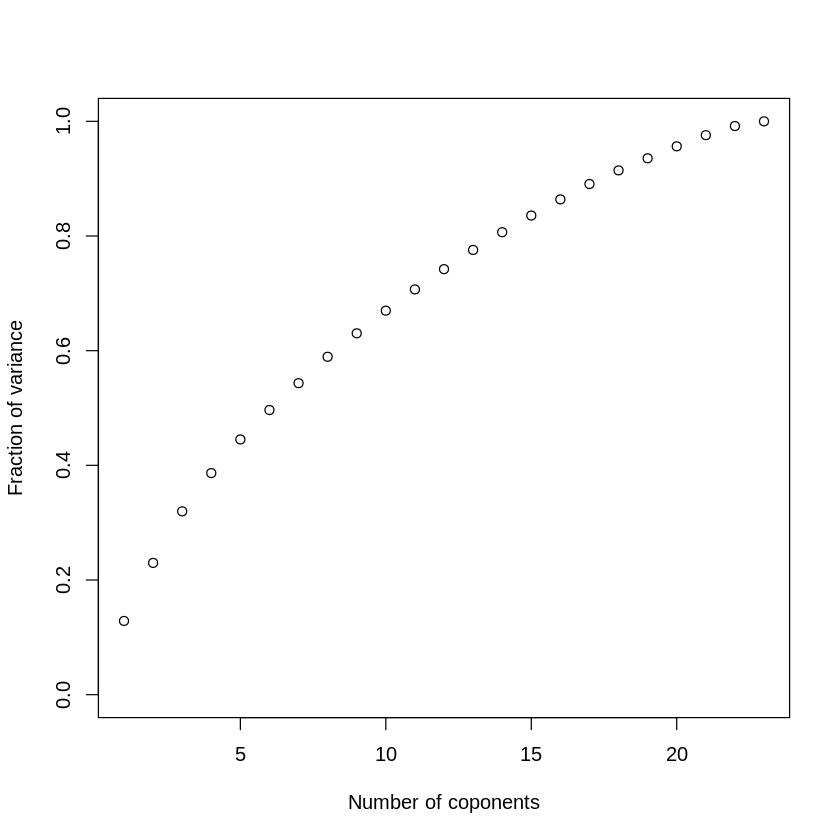

In [14]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [15]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [16]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Summer_avgF,23,0.66
Latitude,12,0.65
Attitude,14,0.46
EnergyC,13,0.42
SqftCate,6,0.38
OwnRent,5,0.33
HouseholdS,7,0.27
Income,10,0.26
SubNorm,19,0.26
MC,17,0.25
HabitG,21,0.23


In [17]:
#fit <- factanal(data2, 2, rotation="varimax")
#print(fit, digits=2, cutoff=.3, sort=TRUE)

In [18]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [19]:
#Age, Income, Educ, OwnRent, SqftCate, EnergyC, MC, ComfNS, HabitC, Attitude, PBC, SubNorm
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Attitude', 'PBC', 'SubNorm')

In [20]:
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));

In [21]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -8.04  -2.31  -0.44   1.28  92.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   9.4621     3.3825    2.80   0.0054 **
Age          -0.0103     0.0323   -0.32   0.7502   
Income        0.0959     0.1936    0.50   0.6206   
Educ         -0.2920     0.3167   -0.92   0.3570   
OwnRent       0.9055     0.7692    1.18   0.2397   
SqftCate      0.2261     0.3591    0.63   0.5293   
EnergyC       0.1321     0.2988    0.44   0.6586   
MC            0.2515     0.3437    0.73   0.4647   
ComfNS       -0.5431     0.2399   -2.26   0.0240 * 
HabitC       -0.6334     0.2487   -2.55   0.0112 * 
Attitude     -0.8334     0.3884   -2.15   0.0324 * 
PBC           0.5720     0.3755    1.52   0.1284   
SubNorm       0.1238     0.2751    0.45   0.6529   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.4 on 494 degrees of freedom
Multiple R

In [22]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1.3,1.3,0.024,0.878
Income,1,39.1,39.1,0.706,0.401
Educ,1,72.4,72.4,1.307,0.254
OwnRent,1,137.7,137.7,2.486,0.115
SqftCate,1,13.7,13.7,0.247,0.620
EnergyC,1,30.9,30.9,0.558,0.455
MC,1,4.4,4.4,0.079,0.779
ComfNS,1,167.2,167.2,3.019,0.083
HabitC,1,360.4,360.4,6.506,0.011
Attitude,1,208.0,208.0,3.755,0.053


In [23]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>73)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    73)

Residuals:
   Min     1Q Median     3Q    Max 
-4.710 -1.483 -0.102  1.609  4.244 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.88342    1.14706    3.39   0.0008 ***
Age          0.01501    0.01129    1.33   0.1843    
Income      -0.02569    0.06225   -0.41   0.6801    
Educ         0.08870    0.10536    0.84   0.4004    
OwnRent     -0.03784    0.25910   -0.15   0.8840    
SqftCate    -0.01752    0.12056   -0.15   0.8846    
EnergyC     -0.11229    0.09923   -1.13   0.2586    
MC          -0.05937    0.11829   -0.50   0.6161    
ComfNS       0.43610    0.08477    5.14  4.7e-07 ***
HabitC      -0.14612    0.08471   -1.73   0.0855 .  
Attitude     0.00336    0.13582    0.02   0.9803    
PBC         -0.09089    0.12705   -0.72   0.4749    
SubNorm      0.07803    0.09381    0.83   0.4061    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual stan

In [24]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1.4e+01,1.4e+01,3.4e+00,6.7e-02
Income,1,7.2e-01,7.2e-01,1.8e-01,6.7e-01
Educ,1,4.4e-02,4.4e-02,1.1e-02,9.2e-01
OwnRent,1,1.9e+00,1.9e+00,4.8e-01,4.9e-01
SqftCate,1,1.6e-04,1.6e-04,3.9e-05,1.0e+00
EnergyC,1,1.9e+01,1.9e+01,4.6e+00,3.2e-02
MC,1,5.6e+00,5.6e+00,1.4e+00,2.4e-01
ComfNS,1,1.1e+02,1.1e+02,2.8e+01,1.8e-07
HabitC,1,1.1e+01,1.1e+01,2.8e+00,9.2e-02
Attitude,1,2.1e-02,2.1e-02,5.2e-03,9.4e-01


In [25]:
library(car)
vif(mod)

Age   Income     Educ  OwnRent SqftCate  EnergyC       MC   ComfNS 
     1.3      1.3      1.2      1.5      1.4      1.7      1.3      1.1 
  HabitC Attitude      PBC  SubNorm 
     1.2      1.9      1.2      1.3

In [26]:
#add CashYN to model
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Attitude', 'PBC', 'SubNorm', 'CashYN')
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));

In [27]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -8.14  -2.29  -0.48   1.23  92.70 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   8.4019     3.4945    2.40    0.017 *
Age          -0.0116     0.0323   -0.36    0.719  
Income        0.0854     0.1937    0.44    0.660  
Educ         -0.3009     0.3166   -0.95    0.342  
OwnRent       0.9344     0.7692    1.21    0.225  
SqftCate      0.2388     0.3591    0.67    0.506  
EnergyC       0.1324     0.2987    0.44    0.658  
MC            0.2306     0.3439    0.67    0.503  
ComfNS       -0.5543     0.2400   -2.31    0.021 *
HabitC       -0.6123     0.2492   -2.46    0.014 *
Attitude     -0.8475     0.3884   -2.18    0.030 *
PBC           0.5593     0.3755    1.49    0.137  
SubNorm       0.1229     0.2750    0.45    0.655  
CashYNTRUE    1.4677     1.2229    1.20    0.231  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.4

In [28]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1.3,1.3,0.024,0.878
Income,1,39.1,39.1,0.706,0.401
Educ,1,72.4,72.4,1.308,0.253
OwnRent,1,137.7,137.7,2.488,0.115
SqftCate,1,13.7,13.7,0.247,0.620
EnergyC,1,30.9,30.9,0.559,0.455
MC,1,4.4,4.4,0.079,0.779
ComfNS,1,167.2,167.2,3.022,0.083
HabitC,1,360.4,360.4,6.512,0.011
Attitude,1,208.0,208.0,3.759,0.053


In [29]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>73)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    73)

Residuals:
   Min     1Q Median     3Q    Max 
-4.292 -1.467 -0.134  1.557  4.559 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.20558    1.17875    2.72   0.0069 ** 
Age          0.01587    0.01122    1.41   0.1583    
Income      -0.03538    0.06200   -0.57   0.5687    
Educ         0.08190    0.10473    0.78   0.4348    
OwnRent     -0.03456    0.25746   -0.13   0.8933    
SqftCate    -0.00278    0.11997   -0.02   0.9816    
EnergyC     -0.10660    0.09863   -1.08   0.2806    
MC          -0.09715    0.11873   -0.82   0.4138    
ComfNS       0.43207    0.08425    5.13  5.1e-07 ***
HabitC      -0.13979    0.08422   -1.66   0.0979 .  
Attitude    -0.00414    0.13500   -0.03   0.9756    
PBC         -0.08942    0.12624   -0.71   0.4793    
SubNorm      0.08671    0.09329    0.93   0.3534    
CashYNTRUE   0.93146    0.41301    2.26   0.0248 *  
---
Signif. codes:  0 '***' 

In [30]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1.4e+01,1.4e+01,3.4e+00,6.5e-02
Income,1,7.2e-01,7.2e-01,1.8e-01,6.7e-01
Educ,1,4.4e-02,4.4e-02,1.1e-02,9.2e-01
OwnRent,1,1.9e+00,1.9e+00,4.9e-01,4.9e-01
SqftCate,1,1.6e-04,1.6e-04,4.0e-05,9.9e-01
EnergyC,1,1.9e+01,1.9e+01,4.7e+00,3.1e-02
MC,1,5.6e+00,5.6e+00,1.4e+00,2.4e-01
ComfNS,1,1.1e+02,1.1e+02,2.9e+01,1.5e-07
HabitC,1,1.1e+01,1.1e+01,2.9e+00,9.0e-02
Attitude,1,2.1e-02,2.1e-02,5.2e-03,9.4e-01


In [31]:
#add CashYN to model
IndepPred = c('Age', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'PBC', 'SubNorm', 'Attitude', 'CashYN')
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>73)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    73)

Residuals:
   Min     1Q Median     3Q    Max 
-4.362 -1.448 -0.153  1.569  4.515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.23177    1.07364    3.01   0.0028 ** 
Age          0.01479    0.01004    1.47   0.1415    
EnergyC     -0.10188    0.09792   -1.04   0.2989    
MC          -0.08672    0.11738   -0.74   0.4605    
ComfNS       0.42792    0.08314    5.15  4.6e-07 ***
HabitC      -0.13713    0.08325   -1.65   0.1005    
PBC         -0.09365    0.12434   -0.75   0.4519    
SubNorm      0.08858    0.09271    0.96   0.3400    
Attitude    -0.00544    0.13376   -0.04   0.9676    
CashYNTRUE   0.93236    0.40915    2.28   0.0233 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2 on 322 degrees of freedom
Multiple R-squared:  0.129,	Adjusted R-squared:  0.105 
F-statistic: 5.31 on 9 and 322 DF,  p-value: 8.94e-07
